<table align="left"  width="100%"> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="../images/qworld.jpg" width="35%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Maksim Dimitrijev (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $ $ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $ 
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{pi}{4}}} } $ 
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $ 
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{pi}{4}}} } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

<h1> Operations on a Bloch sphere </h1>

In this notebook we will cover all one-qubit operations of Qiskit and their meaning on a Bloch sphere. This can be considered as visual tutorial for Qiskit operations, but also this is a constructive way to play around and understand better the Bloch sphere.

<h2> Rotation gates </h2>

We start with the most general form of single-qubit unitary transformation. 

First of all, it should be able to take state $\ket{0}$ to any possible state $\ket{\psi} = \cos{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin{\frac{\theta}{2}} \ket{1}$. These will be the amplitudes of transition in the left column of our transformation. The remaining two entries are filled in a way to ensure that the transformation is unitary and having initial constraints $0 \leq \theta \leq \pi$ and $0 \leq \phi < 2\pi$, we obtain the following general unitary:

$$
\qgate{U} = \mymatrix{cc}{\cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}} \\ e^{i\phi}\sin{\frac{\theta}{2}} & e^{i\lambda + i\phi}\cos{\frac{\theta}{2}}},
$$

where $0 \leq \theta \leq \pi$ and $0 \leq \phi, \lambda < 2\pi$. Upto a global phase every unitary can be expressed in this form, and we will see how specific transformations will work. 

<h3> $\qgate{U}$-gate </h3>

Qiskit gives us access to the most general one-qubit unitary: $\qgate{U}(\theta, \phi, \lambda)$. The syntax is the following:

$$
qc.u(\theta, \phi, \lambda, qubit),
$$

where each angle is in radians.

Let's have an example, where we apply $\qgate{U}$ with each angle $\frac{\pi}{2}$ to the qubit in state $\ket{0}$. Try to predict the resulting state before launching the code. Then try to begin from state $\ket{1}$ (uncomment the code that applies $X$-gate), and guess what will be the difference.

In [4]:
# Import necessary libraries once.
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from numpy import arcsin
from qiskit.visualization import plot_bloch_vector, bloch
from matplotlib.pyplot import text
from qutip import *

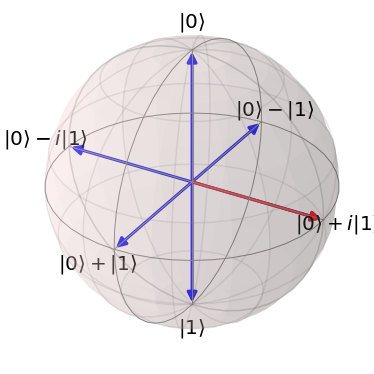

In [5]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

#mycircuit.x(qreg[0])
mycircuit.u(pi/2, pi/2, pi/2, qreg[0])
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<h3> Phase gate </h3>

Gate $\qgate{P}$ is responsible for phase. $\qgate{P}(\lambda) = U(0, 0, \lambda)$. In matrix form we have the following unitary operation:

$$
\mymatrix{cc}{1 & 0 \\ 0 & e^{i \lambda}}
$$

The syntax of gate $\qgate{P}$ is the following ($\lambda$ in radians):

$$
qc.p(\lambda, qubit).
$$

To see the effect of phase that $\qgate{P}$ produces, we will need to start from superposition, and so in the beginning we will apply $H$-gate to our qubit.

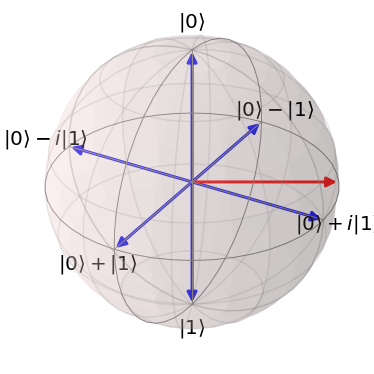

In [6]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.h(qreg[0])
mycircuit.p(2*pi/3, qreg[0])
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<h3> Task 1 </h3>

We have prepared two circuits for you to be able to visualize the state before and after applying some operations. Play around with $U$ and $P$ gates to feel more confident with their usage. Note that green state represents the state before the operation, and red - after.

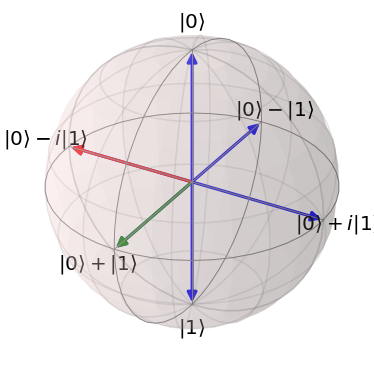

In [7]:
qreg =  QuantumRegister(1)

def initial_circuit():
    creg = ClassicalRegister(1)
    circuit = QuantumCircuit(qreg,creg)
    
    # Change this to begin from different state.
    circuit.h(qreg[0])
    
    return circuit

mycircuit = initial_circuit()
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles1 = state_to_angles(current_quantum_state)

mycircuit = initial_circuit()

# Apply operations for new state here
mycircuit.p(3*pi/2,qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state2=job.result().get_statevector(mycircuit)

angles2 = state_to_angles(current_quantum_state2)

%run drawing.py
draw_bloch2(angles1[0], angles1[1], angles2[0], angles2[1])

<h2> Rotation around z-axis </h2>

Small reminder: z-axis is the one, where states $\ket{0}$ and $\ket{1}$ are located.

Gate $\qgate{RZ}$ allows rotations around z-axis, and is responsible for the phase. Note that $\qgate{P}$-gate is equivalent to $\qgate{RZ}$ up to a phase factor $\qgate{RZ}(\phi)=e^{-iλ/2}\qgate{P}(\phi)$. In matrix form we have the following unitary operation:

$$
\mymatrix{cc}{e^{\frac{-i \phi}{2}} & 0 \\ 0 & e^{\frac{i \phi}{2}}}
$$

The syntax of the $\qgate{RZ}$ gate is the following ($\phi$ in radians):

$$
qc.rz(\phi, qubit).
$$

To see the effect of phase that $\qgate{RZ}$ produces, we will need to start from superposition, and so in the beginning we will apply $\qgate{H}$-gate to our qubit. Make sure, that you have no trouble to predict where the phase will appear on the Bloch sphere.

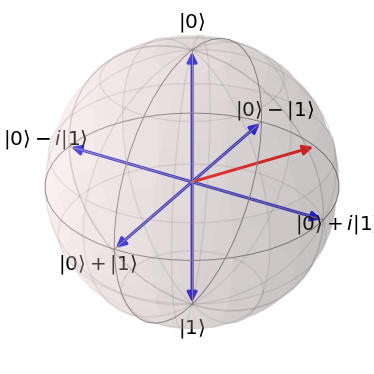

In [8]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.h(qreg[0])
mycircuit.rz(5*pi/6, qreg[0])
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<h3> Task 2 </h3>

For which states the application of $\qgate{RZ}$ does not change the state? Test them with the code, by trying also different angles for $\qgate{RZ}$ rotation.

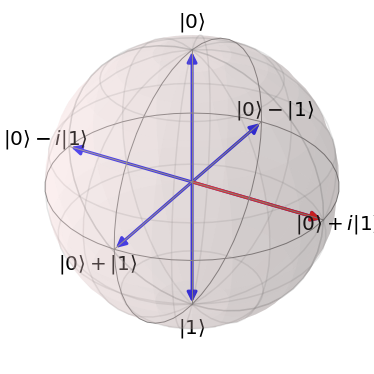

In [9]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

# Try to create initial state here:
mycircuit.h(qreg[0])

# Apply Rz with different angles to see that you found the needed state.
mycircuit.rz(pi/2, qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task2">click for our solution</a>

<h2> Rotation around y-axis </h2>

Small reminder: y-axis is the one, where states $\frac{1}{\sqrt{2}} (\ket{0} + i\ket{1})$ and $\frac{1}{\sqrt{2}} (\ket{0} - i\ket{1})$ are located.

Gate $\qgate{RY}$ allows rotations around y-axis, and you will see, that it is almost as easily understandable as gate $\qgate{RZ}$. With this gate we can obtain any state with real-valued amplitues, because it changes the angle $\theta$. The gate is a specific case of $U$: $\qgate{RY}(\theta) = U(\theta, 0, 0)$. In matrix form we have the following unitary operation:

$$
\mymatrix{cc}{\cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\ \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}}
$$

The syntax of gate $\qgate{RY}$ is the following ($\theta$ in radians):

$$
qc.ry(\theta, qubit).
$$

Convince yourself that you can easily guess where the state will appear on the Bloch sphere, if initial state is $\ket{0}$.

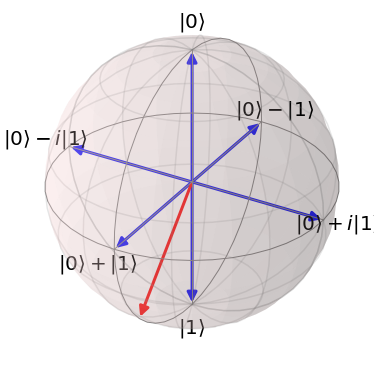

In [10]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.ry(3*pi/4, qreg[0])
job = execute(mycircuit,Aer.get_backend('statevector_simulator'))
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<h3> Task 3 </h3>

For which states the application of $\qgate{RY}$ do not change the state? Test them with the code, by trying also different angles for $\qgate{RY}$ rotation.

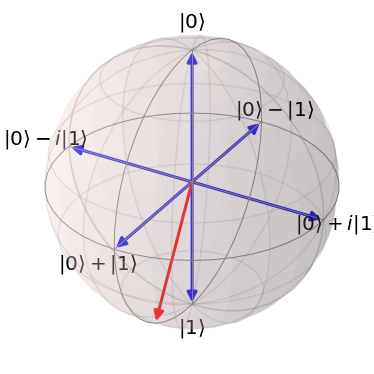

In [11]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

# Try to create initial state here:
mycircuit.h(qreg[0])

# Apply Ry with different angles to see that you found the needed state.
mycircuit.ry(pi/3, qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task3">click for our solution</a>

<h2> Rotation around x-axis </h2>

Small reminder: x-axis is the one, where states $\frac{1}{\sqrt{2}} (\ket{0} + \ket{1})$ and $\frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$ are located.

Gate $\qgate{RX}$ allows rotations around x-axis. Its operation looks a bit more complicated, than the other two rotations. The gate is a specific case of $\qgate{U}$: $R_x(\theta) = \qgate{U}(\theta, -\frac{\pi}{2}, \frac{\pi}{2})$. In matrix form we have the following unitary operation:

$$
\mymatrix{cc}{\cos{\frac{\theta}{2}} & -i\sin{\frac{\theta}{2}} \\ -i\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}}
$$

Notice that the matrix form is quite similar to the matrix of $\qgate{RY}$ rotation. The syntax of gate $\qgate{RX}$ is the following ($\theta$ in radians):

$$
qc.rx(\theta, qubit).
$$

Convince yourself that you can easily guess where the state will appear on the Bloch sphere, if initial state is $\ket{0}$.

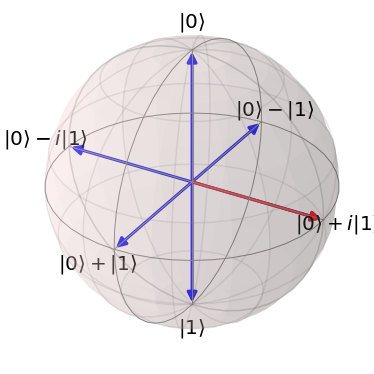

In [12]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

mycircuit.rx(3*pi/2, qreg[0])
job = execute(mycircuit,Aer.get_backend('statevector_simulator'))
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<h3> Task 4 </h3>

For which states the application of $\qgate{RX}$ do not change the state? Test them with the code, by trying also different angles for $\qgate{RX}$ rotation.

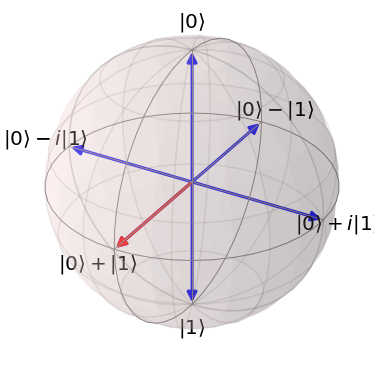

In [13]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

# Try to create initial state here:
mycircuit.h(qreg[0])

# Apply Ry with different angles to see that you found the needed state.
mycircuit.rx(pi/3, qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task4">click for our solution</a>

After playing around with different rotations, you should have a good sense of the directions of these rotations. The following code summarizes what you have learnt upto now - you can see the initial point of rotation and its direction.

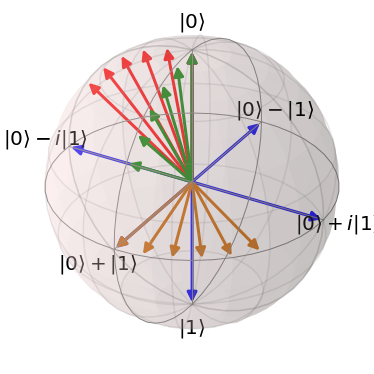

In [14]:
from qiskit.visualization import plot_bloch_vector, bloch
from matplotlib.pyplot import text
from math import pi, cos, sin
from qutip import *

# preparing the sphere
sphere = bloch
sphere.Bloch
b = Bloch()
# preparing the lables
b.ylpos = [1.1, -1.2]
b.xlabel = ['$\\left|0\\right>+\\left|1\\right>$', '$\\left|0\\right>-\\left|1\\right>$']
b.ylabel = ['$\\left|0\\right>+i\\left|1\\right>$', '$\\left|0\\right>-i\\left|1\\right>$']
# first 6 drawn vectors will be blue, the 7th - red
b.vector_color = ['b','b','b','b','b','b','r','r','r','r','r','r','g','g','g','g','g','g','#CC6600','#CC6600','#CC6600','#CC6600','#CC6600','#CC6600']
# drawing vectors of orthogonal states (most popular bases), note the coordinates of vectors,
# they correspond to the according states.
b.add_vectors([[0,0,1],[0,0,-1],[0,1,0],[0,-1,0],[1,0,0],[-1,0,0]])

# X-rotation
theta = 0
phi = 3*pi/2
for i in range(6):
    # calculating the coordinates
    x = sin(theta)*cos(phi)
    y = sin(theta)*sin(phi)
    z = cos(theta)
    b.add_vectors([x,y,z])
    theta = theta + pi/16

# Y-rotation
theta = 0
phi = 0
for i in range(6):
    # calculating the coordinates
    x = sin(theta)*cos(phi)
    y = sin(theta)*sin(phi)
    z = cos(theta)
    b.add_vectors([x,y,z])
    theta = theta + pi/16

# Z-rotation
theta = pi/2
phi = 0
for i in range(6):
    # calculating the coordinates
    x = sin(theta)*cos(phi)
    y = sin(theta)*sin(phi)
    z = cos(theta)
    b.add_vectors([x,y,z])
    phi = phi + pi/16
    

# showing the Bloch sphere with all that we have prepared
b.show()

### Optional ###

$\qgate{X}$, $\qgate{Y}$, $\qgate{Z}$ operators give rise to the rotations operators $\qgate{RX}$, $\qgate{RY}$, $\qgate{RZ}$ when they are exponentiated.

- $R_x(\theta) = e^{-i X \theta/2}$

- $R_y(\theta) = e^{-iY\theta/2}$

- $R_z(\theta) = e^{-iZ\theta/2}$


If $A^2 = I$ is satisfied, then $e^{iAx} = cos(x)I + isin(x)A$

 $R_x(\theta) = cos\left( \dfrac{\theta}{2} \right)I - isin\left(\dfrac{\theta}{2}\right)X = \mymatrix{ll}{cos\left(\dfrac{\theta}{2}\right)&-isin\left(\dfrac{\theta}{2}\right)\\-isin\left(\dfrac{\theta}{2}\right)&cos\left(\dfrac{\theta}{2}\right)}$

$R_y(\theta) = cos\left(\dfrac{\theta}{2}\right)I - isin\left(\dfrac{\theta}{2}\right)Y = \mymatrix{ll}{cos\left(\dfrac{\theta}{2}\right)&-sin\left(\dfrac{\theta}{2}\right)\\sin\left(\dfrac{\theta}{2}\right)&cos\left(\dfrac{\theta}{2}\right)}$

$R_z(\theta)  = cos\left(\dfrac{\theta}{2}\right)I -i\sin\left(\dfrac{\theta}{2}\right)Z=\mymatrix{ll}{cos\left(\dfrac{\theta}{2}\right)-isin\left(\dfrac{\theta}{2}\right)&0\\0&cos\left(\dfrac{\theta}{2}\right)+isin\left(\dfrac{\theta}{2}\right)} =\mymatrix{ll}{e^{-i\theta/2}&0\\0&e^{i\theta/2}}$



<h2> Identity gate </h2>

This gate might sound useless, because it does not change the state of the qubit. On the other hand, we can think about at least two ways to use it. 

First - to structure our quantum circuit. If we have qubits with some operations being applied, we may want to apply identity to the remainig qubits of the circuit to have step-by-step operations applied to all qubits. 

Second - identity gate still takes computational time, and for some reason we might want to have this delay in computations, e.g., to test how real quantum computer preserves the state of the qubit over time. 

In matrix form we have the following unitary operation:

$$
\qgate{I}= \mymatrix{cc}{1 & 0 \\ 0 & 1}
$$

The syntax of identity gate is the following:

$$
qc.id(qubit).
$$

<h2> Pauli gates </h2>

After checking more complicated operations, we now will have better understanding of more basic operations with which we are very familiar. Pauli gates are $\qgate{X}$, $\qgate{Y}$, and $\qgate{Z}$.

<h3> $\qgate{X}$ gate </h3>

It is also called bit-flip gate. You can guess that it is somehow related to the x-axis.Note that x-gate is also an instance of $\qgate{U}$ gate, i.e., $\qgate{U}(\pi, 0, \pi)$. In fact it is rotation around x-axis by 180 degrees ($\pi$). Here we can see the matrix form of this operation:

$$
\qgate{X} = \X
$$

The syntax of $\qgate{X}$-gate is the following:

$$
qc.x(qubit).
$$

Convince yourself that for any initial state $\qgate{X}$-gate performs rotation by 180 degrees around x-axis.

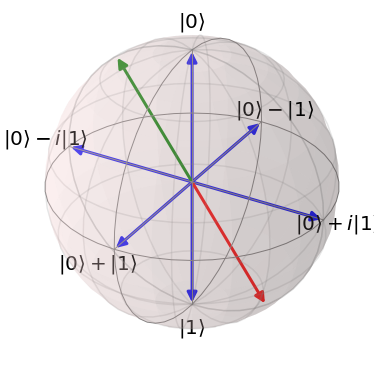

In [15]:
qreg =  QuantumRegister(1)

def initial_circuit():
    creg = ClassicalRegister(1)
    circuit = QuantumCircuit(qreg,creg)
    
    # Change this to begin from different state.
    circuit.rx(pi/5, qreg[0])
    
    return circuit

mycircuit = initial_circuit()
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles1 = state_to_angles(current_quantum_state)

mycircuit = initial_circuit()

# Apply x-gate for new state here
mycircuit.x(qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state2=job.result().get_statevector(mycircuit)

angles2 = state_to_angles(current_quantum_state2)

%run drawing.py
draw_bloch2(angles1[0], angles1[1], angles2[0], angles2[1])

<h3> $\qgate{Z}$ gate </h3>

It is also called phase-flip gate. $\qgate{Z}$-gate is an instance of $\qgate{P}$ gate, i.e., $\qgate{Z} = \qgate{P}(\pi)$. In fact it is rotation around the z-axis by 180 degrees ($\pi$). Here we can see the matrix form of this operation:

$$
\qgate{Z} = \Z
$$

The syntax of $\qgate{Z}$-gate is the following:

$$
qc.z(qubit).
$$

Convince yourself that for any initial state $\qgate{Z}$-gate makes rotation by 180 degrees around z-axis.

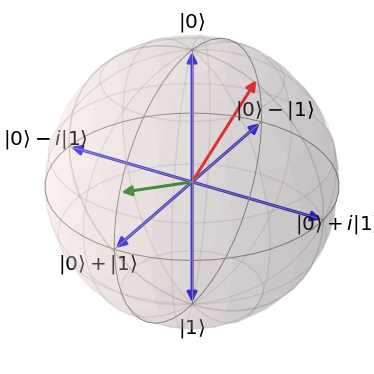

In [16]:
qreg =  QuantumRegister(1)

def initial_circuit():
    creg = ClassicalRegister(1)
    circuit = QuantumCircuit(qreg,creg)
    
    # Change this to begin from different state.
    circuit.rx(3*pi/8, qreg[0])
    circuit.rz(pi/2, qreg[0])
    
    return circuit

mycircuit = initial_circuit()
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles1 = state_to_angles(current_quantum_state)

mycircuit = initial_circuit()

# Apply z-gate for new state here
mycircuit.z(qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state2=job.result().get_statevector(mycircuit)

angles2 = state_to_angles(current_quantum_state2)

%run drawing.py
draw_bloch2(angles1[0], angles1[1], angles2[0], angles2[1])

<h3> $\qgate{Y}$ gate </h3>

It is also called bit- and phase-flip gate. $\qgate{Y}$-gate can be also defined as an instance of $\qgate{U}$ gate, i.e., $\qgate{Y} = \qgate{U}(\pi, \frac{\pi}{2}, \frac{\pi}{2})$. In fact it is rotation around y-axis by 180 degrees ($\pi$). Here we can see the matrix form of this operation:

$$
Y = \Y
$$

The syntax of $\qgate{Y}$-gate is the following:

$$
qc.y(qubit).
$$

Convince yourself that for any initial state $\qgate{Y}$-gate performs rotation by 180 degrees around $\qgate{Y}$-axis.

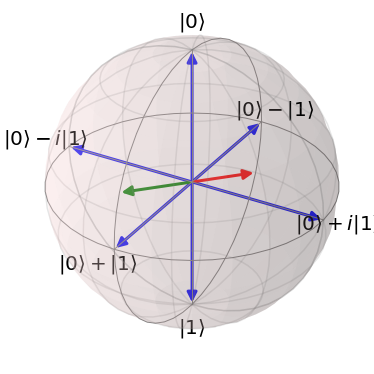

In [17]:
qreg =  QuantumRegister(1)

def initial_circuit():
    creg = ClassicalRegister(1)
    circuit = QuantumCircuit(qreg,creg)
    
    # Change this to begin from different state.
    circuit.rx(3*pi/8, qreg[0])
    circuit.rz(pi/2, qreg[0])
    
    return circuit

mycircuit = initial_circuit()
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles1 = state_to_angles(current_quantum_state)

mycircuit = initial_circuit()

# Apply y-gate for new state here
mycircuit.y(qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state2=job.result().get_statevector(mycircuit)

angles2 = state_to_angles(current_quantum_state2)

%run drawing.py
draw_bloch2(angles1[0], angles1[1], angles2[0], angles2[1])

<h3> Task 5 </h3>

What are the possible states that can be obtained from state $\ket{0}$ by using only gates $\qgate{X}$, $\qgate{Y}$, $\qgate{Z}$?

What are the possible states that can be obtained from state $\frac{1}{\sqrt{2}} (\ket{0} + \ket{1})$ by using only gates $\qgate{X}$, $\qgate{Y}$, $\qgate{Z}$?

You can also try checking this by writing the code.

In [18]:
#
# your code is here
#


<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task5">click for our solution</a>

<h2> Clifford gates </h2>


<h3> Hadamard gate </h3>

Usually people like this gate, because it allows to create superpositions and is used in many quantum algorithms. The tricky question is - how is this operation represented on a Bloch sphere?

Hadamard gate is also an instance of $\qgate{U}$ gate, i.e., $\qgate{H} = U(\frac{\pi}{2},0, \pi)$. Here we can see the matrix form of this operation:

$$
\qgate{H} = \frac{1}{\sqrt{2}} \mymatrix{cc}{1 & 1 \\ 1 & -1}  = \hadamard
$$

Let's check how this operation could be followed on a Bloch sphere. 

$R_y(\theta) = \qgate{U}(\theta, 0, 0)$, so we might think, that rotation by $\frac{\pi}{2}$ around y-axis is involved. This also complies well with the states we get after applying $\qgate{H}$-gate to the states $\ket{0}$ and $\ket{1}$. Now we check the matrix of $R_y(\frac{\pi}{2})$:

$$
\mymatrix{cc}{\cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\ \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}} = \mymatrix{cc}{\cos{\frac{\pi}{4}} & -\sin{\frac{\pi}{4}} \\ \sin{\frac{\pi}{4}} & \cos{\frac{\pi}{4}}} = \frac{1}{\sqrt{2}} \mymatrix{cc}{1 & -1 \\ 1 & 1}.
$$

This matrix is quite similar to the matrix of Hadamard operation, and magic happens if we apply x-gate:

$$
\frac{1}{\sqrt{2}} \mymatrix{cc}{1 & 1 \\ 1 & -1} = \X \frac{1}{\sqrt{2}} \mymatrix{cc}{1 & -1 \\ 1 & 1}.
$$

Hence we can conclude that Hadamard operation is a rotation around y-axis by 90 degrees, followed by a rotation around x-axis by 180 degrees.

Hadamard operator also be expressed as a rotation by 180 degrees around one specific axis, which is located on xz-plane, 45 degrees from the state $\ket{0}$ (in y-direction). Here you can check the code that nicely demonstrates mentioned rotation axis (black arrow) and transitions of two Hadamard operators, applied to the state $\ket{0}$ one by one. The code is taken from [here](https://physics.stackexchange.com/questions/313959/visual-interpretation-on-the-bloch-sphere-when-hadamard-gate-is-applied-twice).

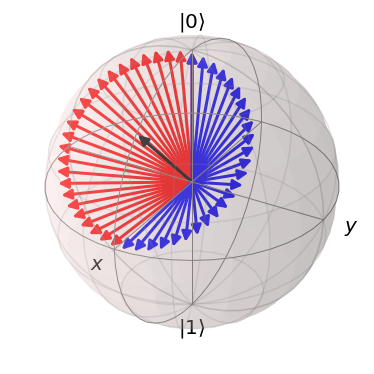

In [19]:
from qutip.qip.operations import *
from qutip import Qobj
import numpy as np
import scipy
import matplotlib.colors
import scipy

#the gate
hadamard = hadamard_transform()
# the hamilton operator describing the evolution during the hadamard gate
hamilton = Qobj(scipy.linalg.logm(hadamard.data.todense()), dims=hadamard.dims) / np.pi * 1.j

#create initial state vector
psi0 = (basis(2, 0)).unit()

# describing the gate as time evolution
def gate(t):
    return (-2*np.pi*1.j*hamilton*t).expm()

# hadamard gate for t = 0.5
# In[1]: gate(0.5)
# Out[3]: 
# Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
# Qobj data =
# [[ 0.70710678  0.70710678]
#  [ 0.70710678 -0.70710678]]

# evolve the gate
n = 25
psi = [gate(t)*psi0 for t in np.linspace(0, 1., 2*n)]

# plotting the states. State evolution during the first hamadard gate is red. During second hadamard gate is blue
b = Bloch()
b.vector_color = [matplotlib.colors.to_rgba('r', alpha=i) for i in np.arange(n)/float(n)] + [matplotlib.colors.to_rgba('b', alpha=i) for i in np.arange(n)/float(n)]  + ['black']
b.add_states(psi)
b.add_states([(basis(2,0) + (basis(2,0) + basis(2,1)).unit()).unit()])

b.show()

The syntax of $\qgate{H}$-gate is the following:

$$
qc.h(qubit).
$$

<h3> Task 6 </h3>

Convince yourself that `qc.h(qubit)` is equal to `qc.ry(pi/2, qubit)`, followed by `qc.x(qubit)`.

Check this for different initial states.

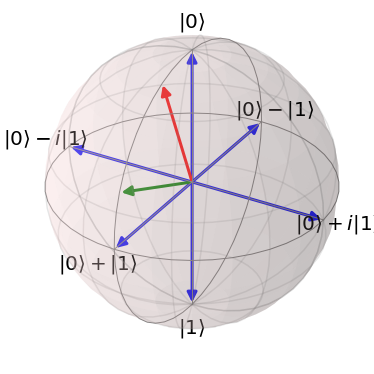

In [20]:
qreg =  QuantumRegister(1)

def initial_circuit():
    creg = ClassicalRegister(1)
    circuit = QuantumCircuit(qreg,creg)
    
    # Change this to begin from different state.
    circuit.rx(3*pi/8, qreg[0])
    circuit.rz(pi/2, qreg[0])
    
    return circuit

mycircuit = initial_circuit()
job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles1 = state_to_angles(current_quantum_state)

mycircuit = initial_circuit()

# Apply h-gate or alternative combination of gates to check the difference.
#mycircuit.h(qreg[0])
mycircuit.ry(pi/2, qreg[0])
mycircuit.x(qreg[0])

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state2=job.result().get_statevector(mycircuit)

angles2 = state_to_angles(current_quantum_state2)

%run drawing.py
draw_bloch2(angles1[0], angles1[1], angles2[0], angles2[1])

<h3> Gates $\qgate{S}$ and $\qgate{S}^\dagger$ </h3>

These two gates geometrically are much simpler, than Hadamard gate. $\qgate{S} = \sqrt{\qgate{Z}} = \qgate{P}({\pi}/{2})$, so it is just a rotation by 90 degrees around z-axis. $\qgate{S}^\dagger$ is conjugate of $\qgate{S}$-gate, and so it is equal to $\qgate{P}(-{\pi}/{2})$, i.e., rotation by -90 degrees around z-axis. Here are matrix forms of both gates:

$$
\qgate{S} = \mymatrix{cc}{1 & 0 \\ 0 & i}, S^\dagger = \mymatrix{cc}{1 & 0 \\ 0 & -i}.
$$

The syntax of $\qgate{S}$-gate is

$$
qc.s(qubit),
$$

while the syntax of $\qgate{S}^\dagger$ is

$$
qc.sdg(qubit).
$$

<h3> Task 7 </h3>

Suppose that we begin in state $\ket{0}$ and have only the following gates available: $\qgate{X}$, $\qgate{Y}$, $\qgate{Z}$, $\qgate{H}$, $\qgate{S}$, $\qgate{S}^\dagger$. How many different states can we reach with all possible combinations of mentioned gates?

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task7">click for our solution</a>

<h2> C3 gates </h2>

Here we have just two gates, $\qgate{T}$ and $\qgate{T}^\dagger$.

<h3> $\qgate{T}$ gate </h3>

This gate also is simply understandable transformation on a Bloch sphere, because $\qgate{T} = \sqrt{\qgate{S}} = \qgate{P}({\pi}/{4})$. $\qgate{T}^\dagger =P(-{\pi}/{4})$, so we will not discuss it in detail, as it can be replaced by sequence of 7 $\qgate{T}$-gates (or more interestingly, by sequence $\qgate{Z}$, $\qgate{S}$, $\qgate{T}$, which does the same). As we see, $\qgate{T}$-gate is a rotation by 45 degrees around z-axis. Matrix representation is the following:

$$
T = \mymatrix{cc}{1 & 0 \\ 0 & e^{i \frac{\pi}{4}}}, T^\dagger = \mymatrix{cc}{1 & 0 \\ 0 & e^{-i \frac{\pi}{4}}}.
$$

The syntax of $\qgate{T}$-gate is

$$
qc.t(qubit),
$$

while the syntax of $\qgate{T}^\dagger$ is

$$
qc.tdg(qubit).
$$

---

Suppose that we have just two gates available - $\qgate{H}$-gate and $\qgate{T}$-gate. How many different states can we reach starting from state $\ket{0}$ and by applying different combinations of both gates (can also apply multiple times)? 

We have a gate, that allows to do rotation by 45 degrees around z-axis, and a gate, that performs a rotation around a specific axis (or simply rotation by 90 degrees around y-axis, followed by a rotation by 180 degrees around x-axis).

Surpirisingly, combination of these two gates allows to approximate arbitrarily precisely any one-qubit operation, in other words, any state of a qubit can be obtained.

There is a proven fact that presence of $\qgate{H}$-gate, $\qgate{T}$-gate and $\qgate{CNOT}$-gate is enough to form a universal quantum computation, which means, that these three operations allow to transform any state of a quantum system to any state. So $\qgate{T}$-gate and $\qgate{H}$-gate are enough for universal one-qubit operations.

<h3> Task 8 </h3>

Reach state $\ket{1}$ by using only $\qgate{H}$-gates and $\qgate{T}$-gates.

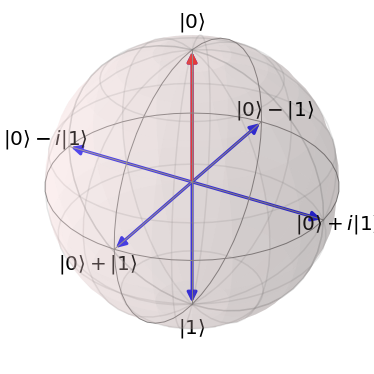

In [21]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

#
# your solution is here
#

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task8">click for our solution</a>

<h3> Task 9 (optional) </h3>

For each of the following well-known operations, write down the sequence of $\qgate{H}$-gates and $\qgate{T}$-gates that replaces it:

<ul>
    <li>$\qgate{X}$-gate</li>
    <li>$\qgate{Z}$-gate</li>
    <li>$\qgate{Y}$-gate</li>
    <li>$\qgate{S}$-gate</li>
</ul>

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task9">click for our solution</a>

<h3> Task 10 (optional) </h3>

Reach the state, such that applying $\qgate{H}$-gate does not change the state. Such state is the axis, around which $\qgate{H}$-gate performs a rotation.

Can you reach also the opposite end of this axis?

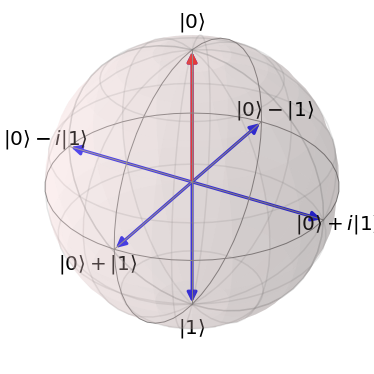

In [22]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

#
# your solution is here
#

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task10">click for our solution</a>

If you manage to solve Task 10, then you have no difficulties to reach any of the following states

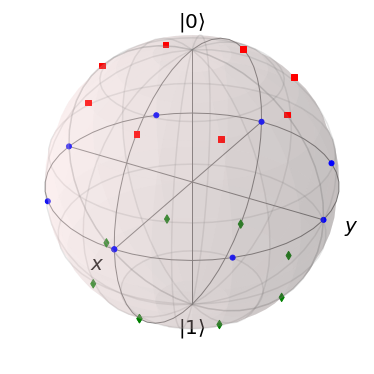

In [23]:
sphere = bloch
sphere.Bloch
b = Bloch()
xp = [np.cos(th) for th in np.linspace(0, 2*pi, 9)]
yp = [np.sin(th) for th in np.linspace(0, 2*pi, 9)]
zp = np.zeros(9)
pnts = [xp, yp, zp]
b.add_points(pnts)
xp = [np.cos(th)*(2**0.5/2) for th in np.linspace(0, 2*pi, 9)]
yp = [np.sin(th)*(2**0.5/2) for th in np.linspace(0, 2*pi, 9)]
zp = np.empty(9)
zp.fill(2**0.5/2)
pnts = [xp, yp, zp]
b.add_points(pnts)
xp = [np.cos(th)*(2**0.5/2) for th in np.linspace(0, 2*pi, 9)]
yp = [np.sin(th)*(2**0.5/2) for th in np.linspace(0, 2*pi, 9)]
zp = np.empty(9)
zp.fill(-2**0.5/2)
pnts = [xp, yp, zp]
b.add_points(pnts)
b.show()

<h3> Task 11 (optional) </h3>

Try to get as close as possible to the state $\ket{0}$ with $\qgate{H}$-gates and $\qgate{T}$-gates, but not exactly to the state $\ket{0}$.

Do you know the combination of $\qgate{H}$-gates and $\qgate{T}$-gates, that will transform this state to the state, which is very close to the state $\ket{1}$?

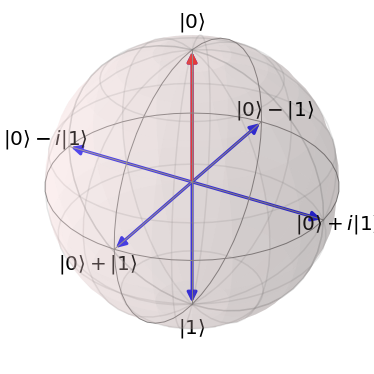

In [24]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

#
# your solution is here
#

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task11">click for our solution</a>

<h3> Task 12 (optional)</h3>

Another way to have universal operations on a qubit is to have rotations available by two axes by any angles. Show how to replace rotation by z-axis with rotations by x-axis and y-axis. You can use the code to do testing.

If you managed to get the idea, try to:
<ul>
    <li>replace rotation by x-axis with rotations by y-axis and z-axis;</li>
    <li>replace rotation by y-axis with rotations by x-axis and z-axis.</li>
</ul>

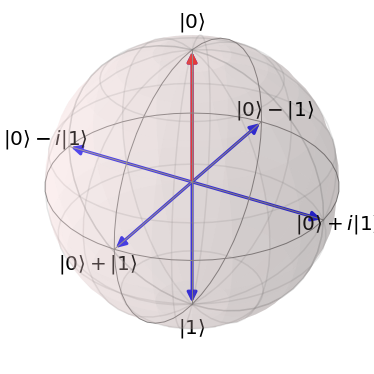

In [25]:
qreg =  QuantumRegister(1)
creg = ClassicalRegister(1)
mycircuit = QuantumCircuit(qreg,creg)

#
# your solution is here
#

job = execute(mycircuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
current_quantum_state=job.result().get_statevector(mycircuit)

%run quantum.py
angles = state_to_angles(current_quantum_state)

%run drawing.py
draw_bloch(angles[0], angles[1])

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task12">click for our solution</a>

<h3> Task 13 (optional, challenging)</h3>

Develop a method that allows to reach any different angle $\theta$ from state $\ket{0}$ with $\qgate{H}$-gates and $\qgate{T}$-gates. For this purpose you can create a function, that takes $\theta$ as a parameter, and returns sequence of $\qgate{H}$-gates and $\qgate{T}$-gates to reach such state.

Try to reach some different angles first, like 45 degrees, 22.5 degrees, 11.25 degrees, angles between them.

In [26]:
#
# your solution is here
#

<a href="C08_Operations_On_Bloch_Sphere_Solutions.ipynb#task13">click for our solution</a>